In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config=configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn=psycopg2.connect(
                        host=host,
                        user=user,
                        password=pwd,
                        dbname=db)

# 3.1

In [4]:
sql="select * from student"

In [6]:
df=pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_8750/2417332674.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


# 3.2

In [7]:
sql="""
select professor.p_name, course.c_name
from professor
inner join course
on professor.p_email = course.p_email
"""

In [8]:
df=pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_8750/2417332674.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


# 3.3

In [11]:
sql="""
select c_number,count(*) as num_student
from enroll
group by c_number
order by num_student desc
"""

/tmp/ipykernel_8750/2130638689.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

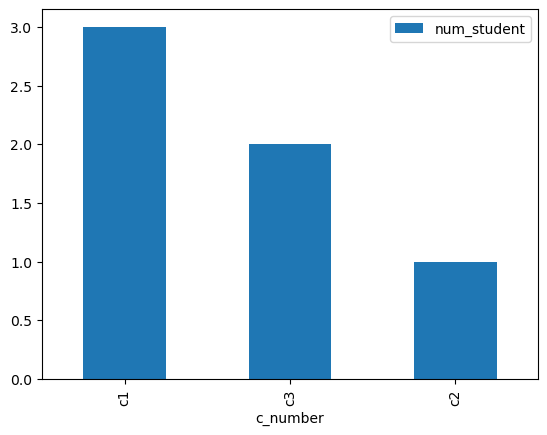

In [15]:
df=pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_student')

# 3.4

In [16]:
sql="""
select professor.p_name, count(course.c_number) as num_courses_taught
from professor
inner join course on professor.p_email = course.p_email
group by professor.p_name
order by num_courses_taught desc
"""

/tmp/ipykernel_8750/1405216886.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

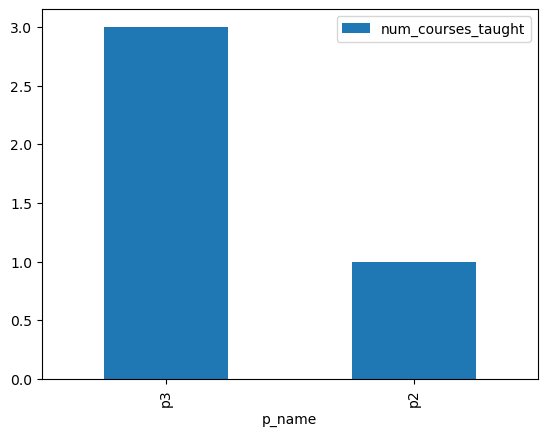

In [17]:
df=pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_courses_taught')

# 3.5

In [25]:
cur=conn.cursor()

In [26]:
sql="""
insert into professor(p_email,p_name,office)
values('p4@jmu.edu','p4','o4')
"""

In [27]:
cur.execute(sql)

In [28]:
df=pandas.read_sql_query('select * from professor',conn)
df[:]

/tmp/ipykernel_8750/3906800274.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select * from professor',conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [29]:
sql="""
insert into course(c_number,c_name,room,p_email)
values('c5','linkedin','r2','p4@jmu.edu')
"""

In [30]:
cur.execute(sql)

In [31]:
df=pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_8750/12676786.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu
